The goal of this demo is to construct and train an artificial neural network on thousands of reviews to predict the review sentiment. The data that will be used is the IMBD database which contains 50K movie reviews. This is a dataset for binary sentiment classification containing a set of 25,000 movie reviews for training and 25,000 for testing.

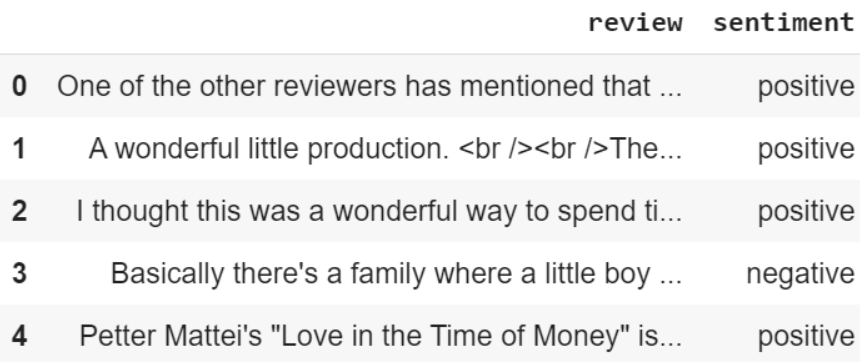

## **Data Exploration**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import random                        # for generating random numbers
#import copy                          # for copying objects

from keras.datasets import imdb     # IMDB dataset is included in Keras
#from keras.datasets import reuters  # Reuters dataset is included in Keras
from keras.models import Sequential  # Model type to be used


from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
#from keras.utils import to_categorical          # Converts a class vector (integers) to binary class matrix.

### Loading the data

Keras comes with a few in-built datasets. To load the IMBD dataset use the dataset.load_data() function. The argument 'num_words=10000' keeps the top 10,000 most frequently occurring words in the training data. The rare words are discarded to keep the size of the data managable.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

When you load the IMDB dataset, it loads sequences of word indices like {‘create’: 984, ‘make’: 94,…}. Here’s how you can convert it back to words.


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])  # Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
# another piece of news
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


The variables train_data and test_data are lists of reviews; each review is a list of word indices. Train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive. Let us print the first element in the data and the labels to see their contents.

In [ ]:
# Print first row of data and labels.
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


## **Data Preparation**

Remember that you can’t feed integer lists with different lengths. We could "one-hot encode" your lists to turn them into vectors of 0s and 1s. This means, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be ones. Then you could use it as the first layer in your network.

In [ ]:
# create a function to vectorize word sequences
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))     # Creates an all-zero matrix of shape (len(sequences), dimension)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1                      # Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data)             # Vectorized training data
x_test = vectorize_sequences(test_data)               # Vectorized test data

Here’s what the samples look like now:

In [ ]:
# Print first element of the training dataset
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels. They can't be intergers, because they will be compared with the model outputs, which are of the float type. So they should be float type too.

In [ ]:
# Vectorize the dataset´s labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## **Model Development**

### Constructing the neural network

The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup you’ll ever encounter. A type of network that performs well on such a problem is a simple stack of two fully connected (Dense) layers with relu activations. The argument being passed to each Dense layer (16) is the number of hidden units of the layer. A hidden unit is a dimension in the representation space of the layer.

A third layer will output the scalar prediction regarding the sentiment of the current review. This output layer will use a sigmoid activation in order to output a probability score (a score between 0 and 1, indicating how likely the sample is to have the sentiment “1”: how likely the review is to be positive).

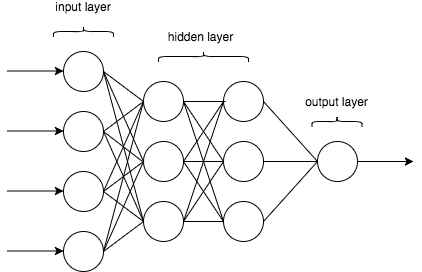

#### **What are activation functions, and why are they necessary?**
Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations—a dot product and an addition: output = dot(W, input) + b

So the layer could only learn linear transformations of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimensional space. Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn’t extend the hypothesis space.

In order to get access to a much richer hypothesis space that would benefit from
deep representations, you need a non-linearity, or activation function. Relu is the most popular activation function in deep learning, but there are many others. Here is a summary of the ones that we will use for this demo.

*Rectified Linear Activation (ReLU)*
The ReLU function is calculated as follows:

*max*(0.0, x)

This means that if the input value (x) is negative, then a value 0.0 is returned, otherwise, the value is returned.

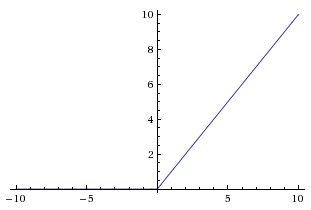

*Logistic (Sigmoid)*

While a 'relu' (rectified linear unit) is a function meant to zero out negative values, whereas a 'sigmoid' “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability.

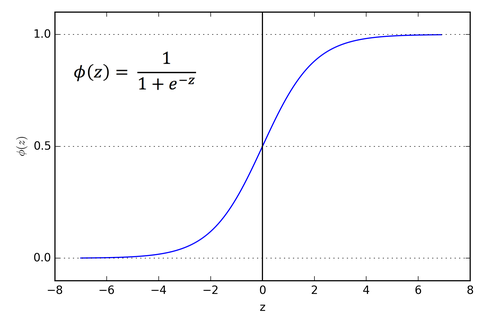


*Softmax*

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

The most common use of the softmax function in applied machine learning is in its use as an activation function in a neural network model. Specifically, the network is configured to output N values, one for each class in the classification task, and the softmax function is used to normalize the outputs, converting them into probabilities that sum to one.
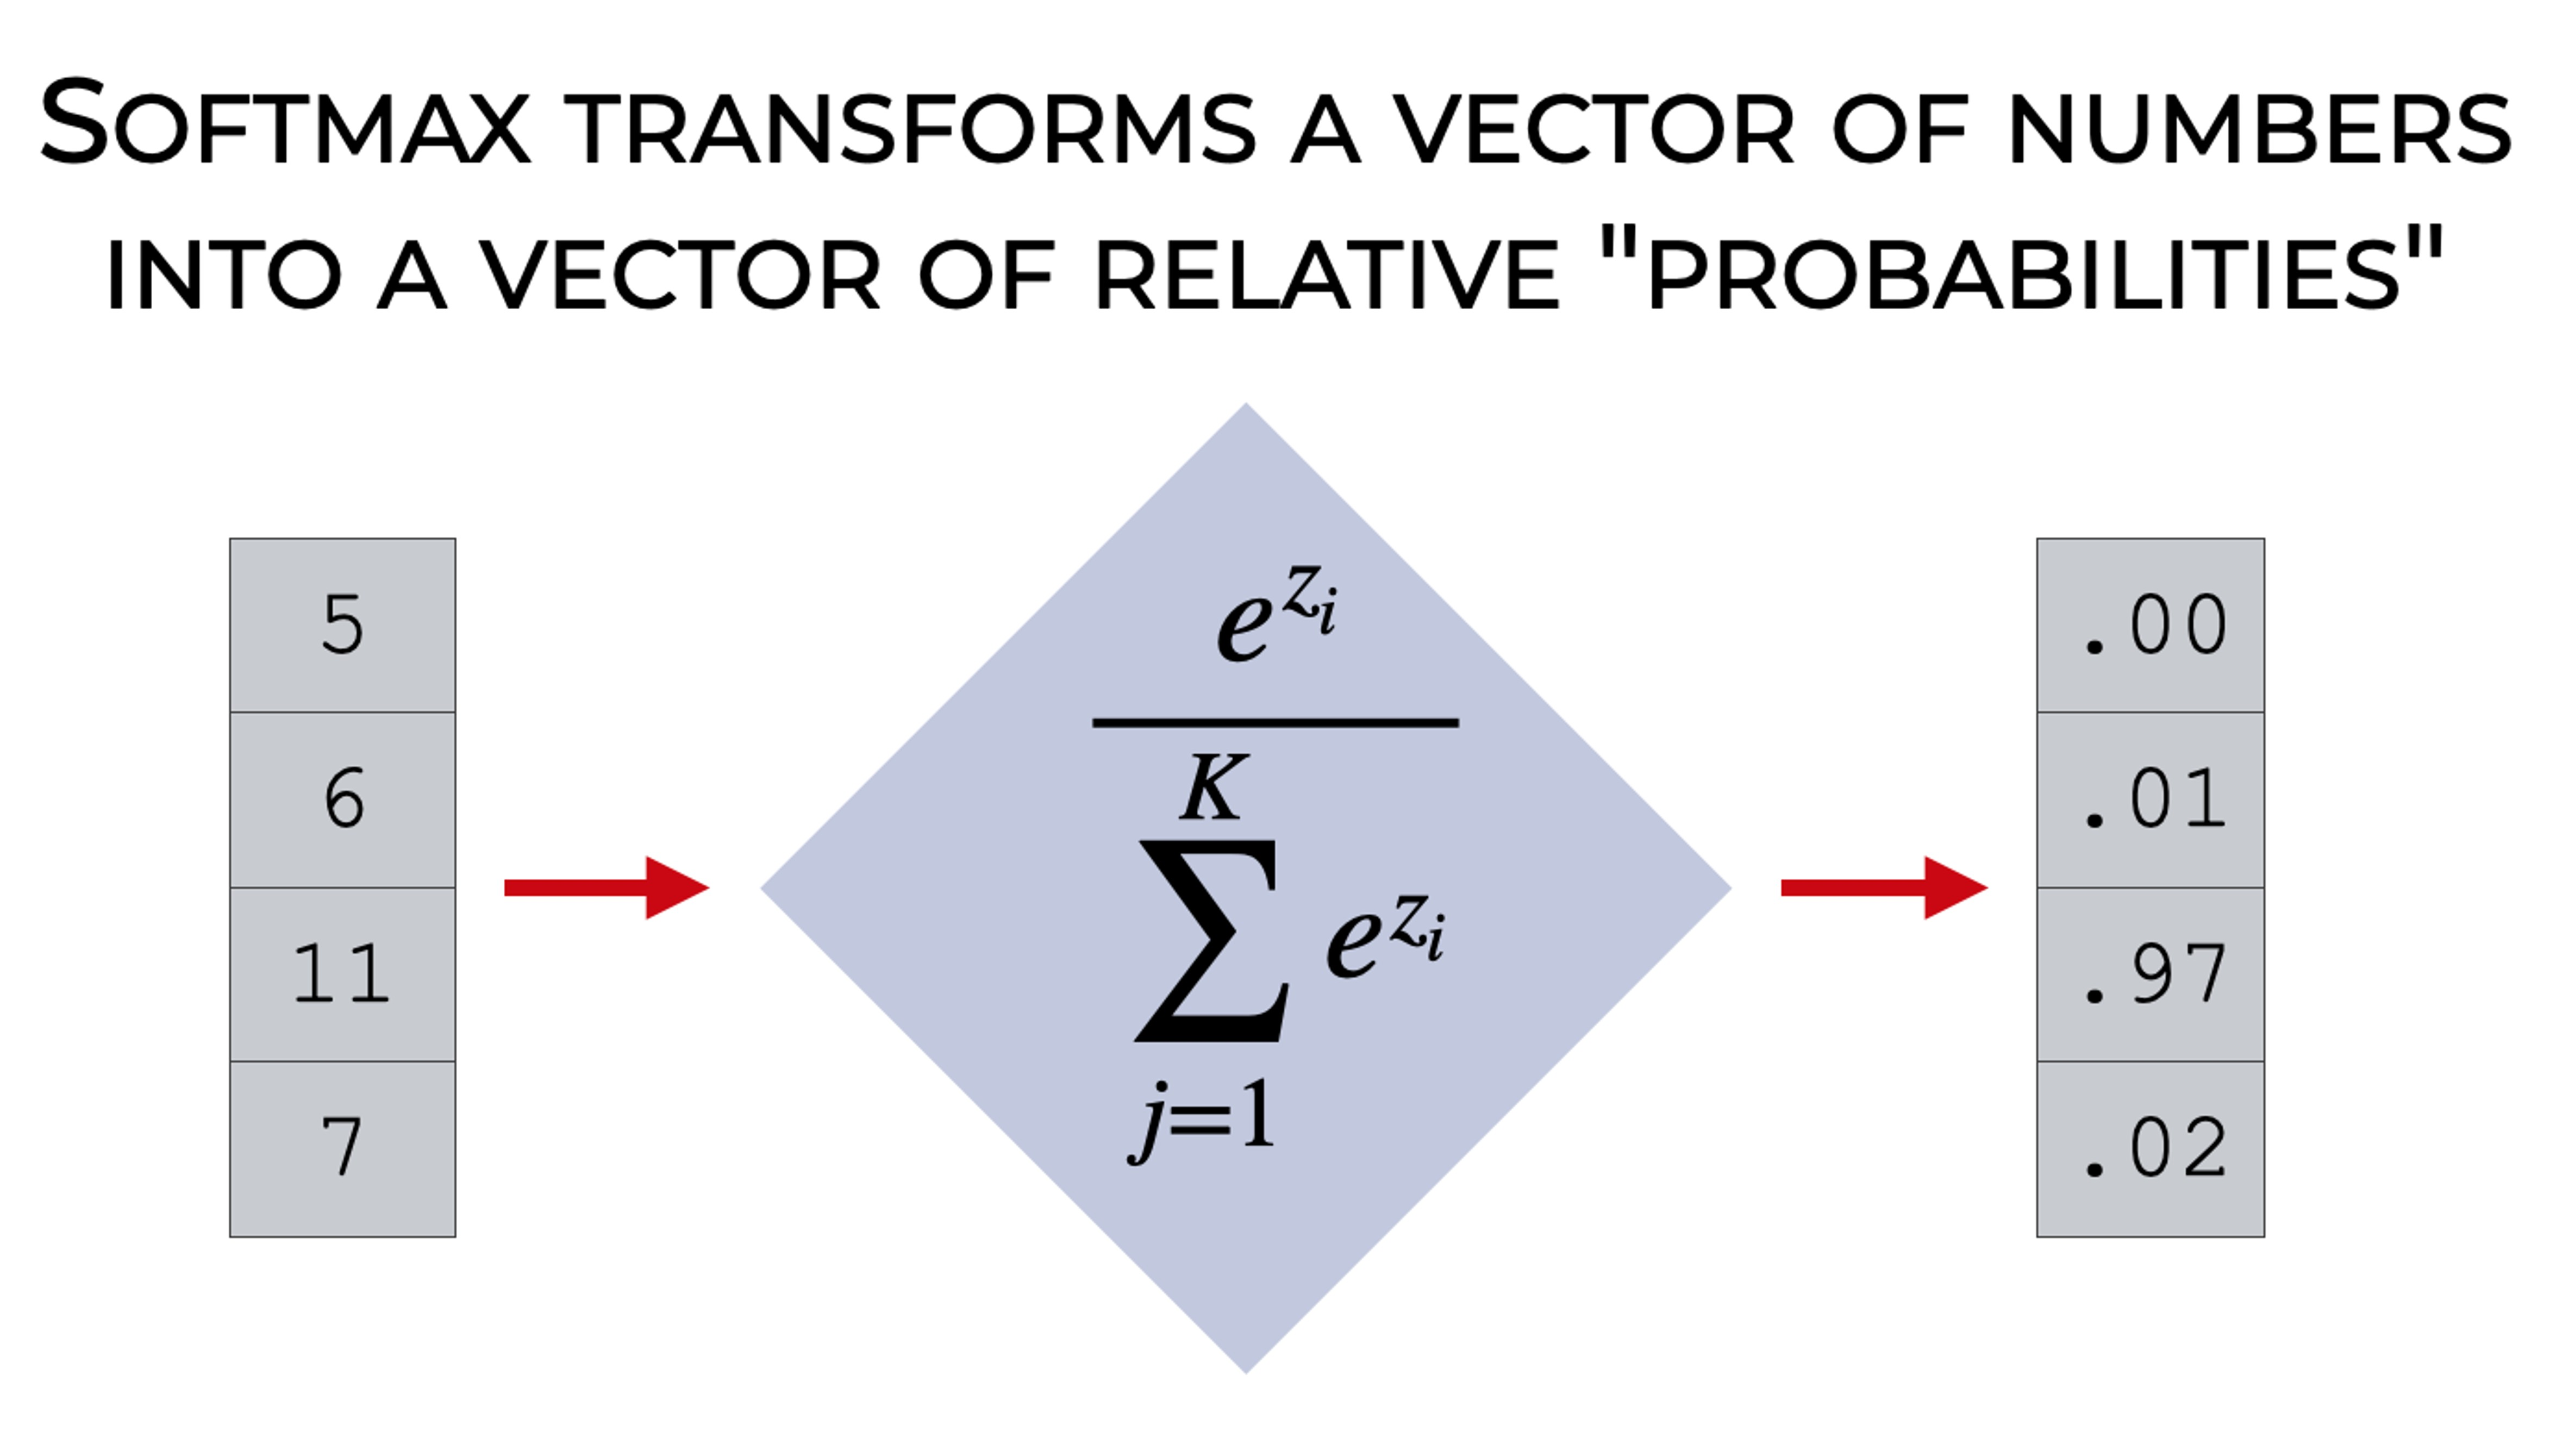

**How to choose the number of Hidden Layers/Neurons?**

The number of neurons in the input layer equals the number of input variables in the data being processed. The number of neurons in the output layer equals the number of outputs associated with each input. But the challenge is knowing the number of hidden layers and their neurons.

Here are some guidelines to know the number of hidden layers and neurons per each hidden layer in a classification problem:

1.   Based on the data, draw an expected decision boundary to separate the classes.
2.   Express the decision boundary as a set of lines. Note that the combination of such lines must yield to the decision boundary.
3.   The number of selected lines represents the number of hidden neurons in the first hidden layer.
5.  To connect the lines created by the previous layer, a new hidden layer is added. Note that a new hidden layer is added each time you need to create connections to the lines in the previous hidden layer.
6.   The number of hidden neurons in each new hidden layer equals the number of connections to be made.

### Creating the neural arquitecture

Now build your neural network. Remember that the intermediate layers will use 'relu' as their activation function, and the final layer will use a 'sigmoid' activation so as to output a probability score (a score between 0 and 1).

In [ ]:
# The Sequential model is a linear stack of layers.
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the model

Finally, you need to choose a loss function and an optimizer for training. Since this is a binary classification problem and the model outputs logits (a single-unit layer with a linear activation), it’s best to use the 'binary crossentropy' loss. This isn't the only choice for a loss function. You could, for instance, choose 'mean squared error'. But, generally, 'binary crossentropy' is better for dealing with probabilities—it measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and the predictions. Compile your model with 'binary crossentropy' loss and choose 'rmsprop' as the optimizer.

In [ ]:
# Use the rmsprop optimizer for learning
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc']) # A metric is a function that is used to judge the performance of your model.

## **Model Validation**

The purpose of model validation is to check the accuracy and performance of the model basis on the past data for which we already have information. Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves.


**Train Learning Curve**: Learning curve calculated from the training dataset that gives an idea of how well the model is learning.

**Validation Learning Curve**: Learning curve calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.


Reviewing learning curves of models during training can be used to diagnose problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative.

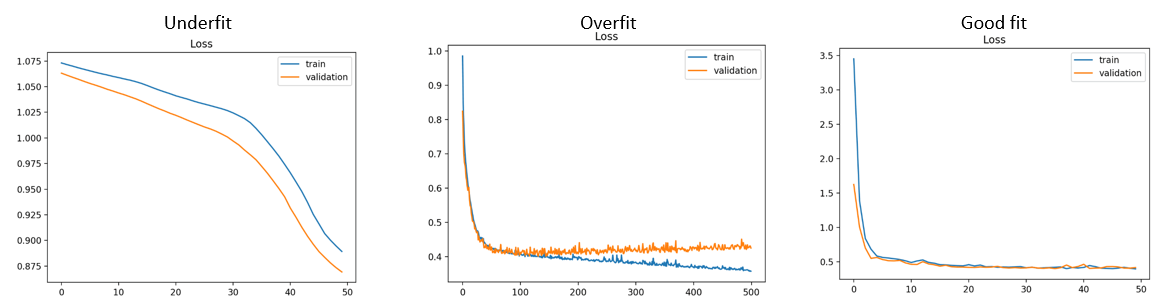



In [ ]:
# Create validation dataset
x_val = x_train[:10000]             # validation data
partial_x_train = x_train[10000:]   # subset data using indexes
y_val = y_train[:10000]             # validation labels
partial_y_train = y_train[10000:]   # subset labels using indexes

**How to choose the batch size**

The batch size depends on the size of each sample in your dataset; you must select the batch size as much as your GPU ram can hold. Also, the number of batch size should be chosen not very much and not very low and in a way that almost the same number of samples for every batch of an epoch.

**How to choose the number of epochs**

An epoch is one learning cycle where the learner sees the whole training data set. The right number of epochs depends on the inherent perplexity (or complexity) of your dataset. A good rule of thumb is to start with a value that is 3 times the number of columns (variables) in your data. If you find that the model is still improving after all epochs complete, try again with a higher value.

More important is the  validation and training error. As long as it keeps dropping training should continue. For instance, if the validation error starts increasing, that might be a indication of overfitting. You should set the number of epochs as high as possible and terminate training based on the error rates.

**What are callbacks?**

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

You define and use a callback when you want to automate some tasks after every training/epoch that help you have controls over the training process. This includes stopping training when you reach a certain accuracy/loss score, saving your model as a checkpoint after each successful epoch, adjusting the learning rates over time, and more.



### Training the model

You’ll now train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples you set aside.

In [ ]:
# Train the model
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 75ms/step - loss: 0.5416 - acc: 0.7787 - val_loss: 0.4029 - val_acc: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3291 - acc: 0.8927 - val_loss: 0.3341 - val_acc: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2416 - acc: 0.9203 - val_loss: 0.2963 - val_acc: 0.8816
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1950 - acc: 0.9337 - val_loss: 0.2823 - val_acc: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1641 - acc: 0.9446 - val_loss: 0.2795 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1375 - acc: 0.9555 - val_loss: 0.2933 - val_acc: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1186 - acc: 0.9635 - val_loss: 0.2961 - val_acc: 0.8856
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1015 - a

### Plotting the training and validation loss

To create the graphs store each metric in different objects. Then, use matplotlib´s 'plt' function to plot the metrics into one graph.

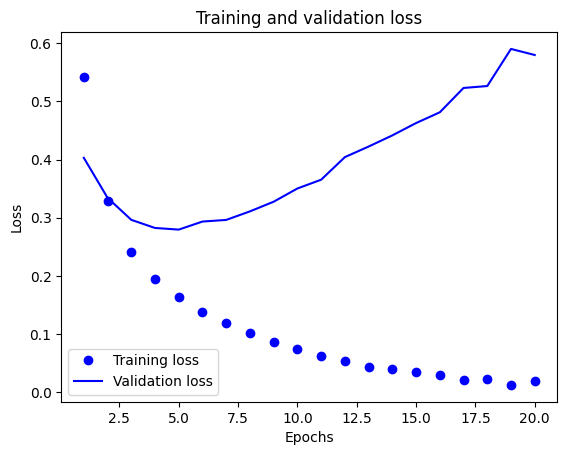

In [ ]:
# First, store the metrics into different objects
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Define the lenght of the x axis
epochs = range(1, len(loss_values) + 1)

# Plot each metric and format the graph
plt.plot(epochs, loss_values, 'bo', label='Training loss')      # “bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # “b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Print the graph.
plt.show()

### Plotting validation and training accuracy

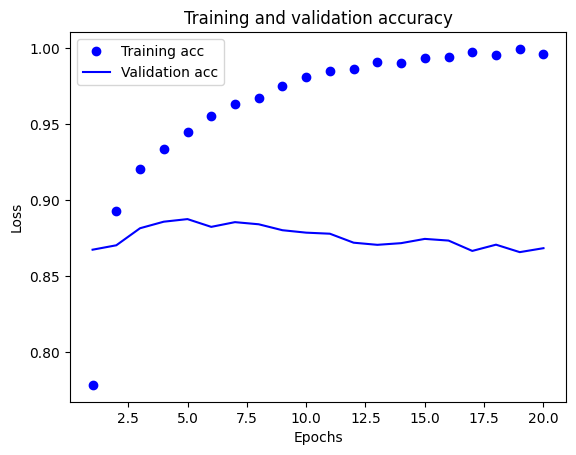

In [ ]:
# The clf() function in pyplot module of matplotlib library is used to clear the current figure.
plt.clf()


acc = history_dict['acc']
val_acc = history_dict['val_acc']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

### Interpreting the graphs

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization — the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of
what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re over-optimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

In this case, to prevent overfitting, you could stop training after four epochs. In general, you can use a range of techniques to mitigate overfitting.

Let’s train a new model from scratch for four epochs and then evaluate it on the test data.

In [ ]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4487 - accuracy: 0.8200
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2651 - accuracy: 0.9044
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2104 - accuracy: 0.9238
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1769 - accuracy: 0.9371


### Evaluating the model

Keras provides a function "evaluate" which does the evaluation of the model. It has three main arguments:

1. Test data
2. Test data label
3. verbose - true or false

Let us evaluate the model using the test set.

In [ ]:
# Evaluate the model
results = model.evaluate(x_test, y_test)

# Print model results
results

782/782 [==============================] - 2s 3ms/step - loss: 0.2870 - accuracy: 0.8860


[0.28703728318214417, 0.8859999775886536]

This naive approach achieves an accuracy of 88%. We have created a model that is able to classify reviews into positive and negative ones. Now let´s use our model to predict the labels of reviews the model has not seen before.

## **Prediction**

### Generating predictions on new data

After having trained an MLP network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method.

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2077217 ],
       [0.99948347],
       [0.8423817 ],
       ...,
       [0.08797739],
       [0.0745749 ],
       [0.578993  ]], dtype=float32)